In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import kerastuner as kt

C:\Users\rajpu\AppData\Local\Temp\ipykernel_38636\1273656030.py:11: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [3]:
df=pd.read_csv("dataset.csv")
df.head

<bound method NDFrame.head of                                                     Text  language
0      klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1      sebes joseph pereira thomas  på eng the jesuit...   Swedish
2      ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3      விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4      de spons behoort tot het geslacht haliclona en...     Dutch
...                                                  ...       ...
21995  hors du terrain les années  et  sont des année...    French
21996  ใน พศ  หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...      Thai
21997  con motivo de la celebración del septuagésimoq...   Spanish
21998  年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...   Chinese
21999   aprilie sonda spațială messenger a nasa și-a ...  Romanian

[22000 rows x 2 columns]>

In [4]:
x=  WordNetLemmatizer()


In [5]:
df.isnull().sum()

Text        0
language    0
dtype: int64

In [6]:
df.duplicated().sum()

141

In [7]:
new_df=df. drop_duplicates()

In [8]:
new_df.duplicated().sum()

0

C:\Users\rajpu\AppData\Local\Temp\ipykernel_38636\1916810133.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette='viridis')


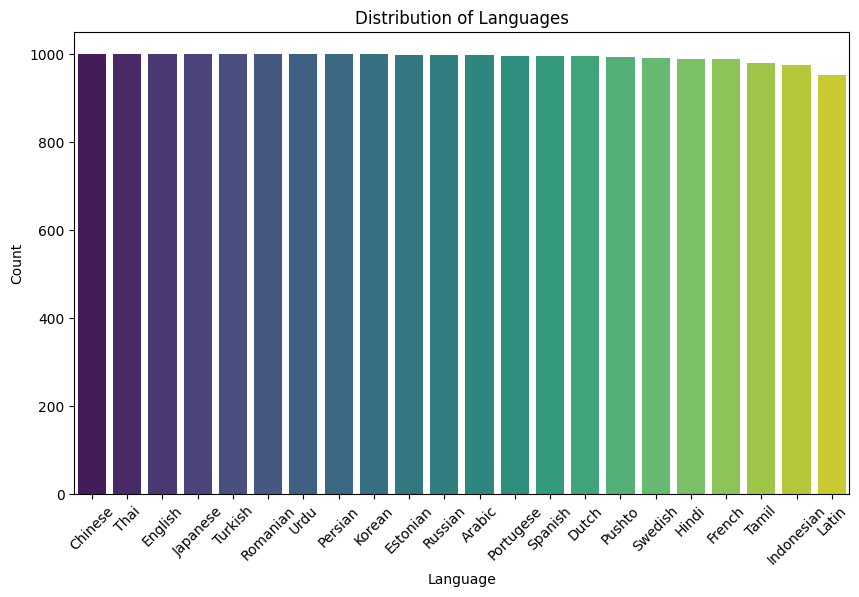

In [9]:
language_counts=new_df["language"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette='viridis')
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Distribution of Languages')
plt.xticks(rotation=45)
plt.show()

In [10]:
new_df.head

<bound method NDFrame.head of                                                     Text  language
0      klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1      sebes joseph pereira thomas  på eng the jesuit...   Swedish
2      ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3      விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4      de spons behoort tot het geslacht haliclona en...     Dutch
...                                                  ...       ...
21995  hors du terrain les années  et  sont des année...    French
21996  ใน พศ  หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...      Thai
21997  con motivo de la celebración del septuagésimoq...   Spanish
21998  年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...   Chinese
21999   aprilie sonda spațială messenger a nasa și-a ...  Romanian

[21859 rows x 2 columns]>

In [11]:
new_df['language'].isnull().sum()
new_df = new_df.dropna(subset=['Text'])  # Drop rows where 'Text' is NaN


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_df["language_no"]=le.fit_transform(new_df["language"])

In [13]:
new_df["language_no"].unique()

array([ 4, 17, 19, 18,  2,  8, 20, 10, 21,  7, 12,  5,  1,  9,  6, 16, 13,
       11, 14, 15,  3,  0])

In [14]:
unique_decoded_languages = sorted(new_df["language_no"].unique())
unique_languages = sorted(new_df["language"].unique())
print(unique_languages)
print("------------------------------------------------------------------------------")
print(unique_decoded_languages)
dicti={}
for i in range(len(unique_decoded_languages)):
    dicti[unique_decoded_languages[i]]=unique_languages[i]


['Arabic', 'Chinese', 'Dutch', 'English', 'Estonian', 'French', 'Hindi', 'Indonesian', 'Japanese', 'Korean', 'Latin', 'Persian', 'Portugese', 'Pushto', 'Romanian', 'Russian', 'Spanish', 'Swedish', 'Tamil', 'Thai', 'Turkish', 'Urdu']
------------------------------------------------------------------------------
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [15]:
print(dicti)

{0: 'Arabic', 1: 'Chinese', 2: 'Dutch', 3: 'English', 4: 'Estonian', 5: 'French', 6: 'Hindi', 7: 'Indonesian', 8: 'Japanese', 9: 'Korean', 10: 'Latin', 11: 'Persian', 12: 'Portugese', 13: 'Pushto', 14: 'Romanian', 15: 'Russian', 16: 'Spanish', 17: 'Swedish', 18: 'Tamil', 19: 'Thai', 20: 'Turkish', 21: 'Urdu'}


In [16]:
corpus=[]
filters=r'!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
for i in range(len(new_df)):
    word=str(new_df.iloc[i]["Text"])
    review=re.sub(filters,' ',word)
    review=review.lower()
    review=review.split()
    review=' '.join(review)
    corpus.append(review)


In [17]:
new_df["Text"][0]

'klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke  aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel – nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel – nime gotvald'

In [18]:
corpus[0]

'klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel – nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel – nime gotvald'

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf= TfidfVectorizer(max_features=2500)
x=tf.fit_transform(corpus).toarray()
y=new_df["language_no"]

In [22]:
input_dim = x.shape[1]
print(input_dim)

2500


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20,test_size=0.20)

In [24]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()
mb.fit(x_test,y_test)

MultinomialNB()

In [25]:
y_pred=mb.predict(x_train)
from sklearn.metrics import accuracy_score
score=accuracy_score(y_train,y_pred)
print(score)

0.9016984045290788


In [26]:
def detect(language):
    x = tf.transform([language])
    y_pred=mb.predict(x)
    print(y_pred)
    return y_pred[0]


In [27]:
text="Oblasti linn Zmiiv sai nimeks gotvald"
print(dicti[detect(text)])

[4]
Estonian


In [28]:
print(dicti)

{0: 'Arabic', 1: 'Chinese', 2: 'Dutch', 3: 'English', 4: 'Estonian', 5: 'French', 6: 'Hindi', 7: 'Indonesian', 8: 'Japanese', 9: 'Korean', 10: 'Latin', 11: 'Persian', 12: 'Portugese', 13: 'Pushto', 14: 'Romanian', 15: 'Russian', 16: 'Spanish', 17: 'Swedish', 18: 'Tamil', 19: 'Thai', 20: 'Turkish', 21: 'Urdu'}


आपसे मिलकर अच्छा लगा -> Hindi
how are you -> english
كيف حالك -> arabic
Oblasti linn Zmiiv sai nimeks gotvald ->estonian


In [39]:
def build_model(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
        if counter == 0:
            model.add(Dense(
                hp.Int('units' + str(i), min_value=8, max_value=128, step=8),
                activation=hp.Choice('activation' + str(i), values=['relu', 'tanh', 'sigmoid']),
                input_dim=2500  # Ensure this matches your input data shape
            ))
            counter += 1
        else:
            model.add(Dense(
                hp.Int('units' + str(i), min_value=8, max_value=128, step=8),
                activation=hp.Choice('activation' + str(i), values=['relu', 'tanh', 'sigmoid']),
            ))

    # Adjust the number of output neurons based on your classification task
    model.add(Dense(22, activation="softmax"))
    
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model


In [40]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,  # Corrected 'max_trails' to 'max_trials'
    directory="mydir",
    project_name="final"  # Corrected 'prject_name' to 'project_name'
)


Reloading Tuner from mydir\final\tuner0.json


In [41]:
tuner.search(x_train, y_train,epochs=5,validation_data=(x_test,y_test))

Trial 3 Complete [00h 00m 12s]
val_accuracy: 0.041399817913770676

Best val_accuracy So Far: 0.041399817913770676
Total elapsed time: 00h 02m 29s


In [44]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 8,
 'units0': 16,
 'activation0': 'relu',
 'units1': 56,
 'activation1': 'sigmoid',
 'units2': 88,
 'activation2': 'tanh',
 'units3': 112,
 'activation3': 'sigmoid',
 'units4': 64,
 'activation4': 'sigmoid',
 'units5': 104,
 'activation5': 'tanh',
 'units6': 112,
 'activation6': 'sigmoid',
 'units7': 8,
 'activation7': 'relu'}

In [45]:
new_model=tuner.get_best_models(num_models=1)[0]

c:\Users\rajpu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\rajpu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [47]:
new_model.fit(x_train, y_train, epochs=25, initial_epoch=5, validation_data=(x_test, y_test))


Epoch 6/25
547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0428 - loss: 3.0912 - val_accuracy: 0.0414 - val_loss: 3.0918
Epoch 7/25
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0470 - loss: 3.0911 - val_accuracy: 0.0414 - val_loss: 3.0920
Epoch 8/25
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0445 - loss: 3.0909 - val_accuracy: 0.0414 - val_loss: 3.0919
Epoch 9/25
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0476 - loss: 3.0910 - val_accuracy: 0.0414 - val_loss: 3.0919
Epoch 10/25
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0469 - loss: 3.0911 - val_accuracy: 0.0428 - val_loss: 3.0920
Epoch 11/25
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0425 - loss: 3.0908 - val_accuracy: 0.0414 - val_loss: 3.0920
Epoch 12/25
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0450 - loss: 3.0908 - val_accuracy: 0.0414 - val_loss: 3.0920
Epoch 13/25
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0428 - loss: 3.0910 - val_accuracy